In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Get the Dataset

In [4]:
!wget -c https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv

--2023-09-18 11:38:28--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8003::154, 2606:50c0:8002::154, 2606:50c0:8000::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8003::154|:443... connected.
HTTP request sent, awaiting response... 416 Range Not Satisfiable

    The file is already fully retrieved; nothing to do.



### EDA

- Load the data.
- Look at the `median_house_value` variable. Does it have a long tail?

In [23]:
df_all = pd.read_csv("housing.csv")

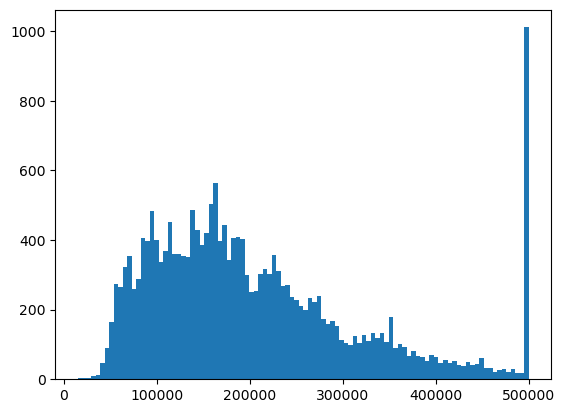

In [24]:
mhv = df_all['median_house_value'].values
plt.hist(mhv, bins=100); plt.show()

- The distribution has a long tail, however there are many values in the last bin

### Preparing the dataset 

For this homework, we only want to use a subset of data. 

First, keep only the records where `ocean_proximity` is either `'<1H OCEAN'` or `'INLAND'`

Next, use only the following columns:

* `'latitude'`,
* `'longitude'`,
* `'housing_median_age'`,
* `'total_rooms'`,
* `'total_bedrooms'`,
* `'population'`,
* `'households'`,
* `'median_income'`,
* `'median_house_value'`

In [26]:
filter1 = df_all["ocean_proximity"] == "<1H OCEAN"
filter2 = df_all["ocean_proximity"] == "INLAND"

cols =  ["latitude", "longitude", "housing_median_age", 
         "total_rooms", "total_bedrooms", "population", 
         "households", "median_income", 
         "median_house_value"]
# alternatively dropping "ocean_proximity" possible

df = df_all[filter1 | filter2]
print(df.shape)
df = df[cols]

print(df.shape)
df.head()

(15687, 10)
(15687, 9)


,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
701,37.64,-121.97,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0
830,37.61,-121.99,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0
859,37.57,-121.97,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0
860,37.58,-121.96,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0
861,37.58,-121.98,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0


# Question 1

**There's one feature with missing values. What is it?**

In [30]:
df.isna().sum()
# Solution: total_bedrooms

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        157
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

# Question 2

**What's the median (50% percentile) for variable `'population'`?**

In [36]:
df["population"].describe().round(2)
# Solution: 1195

count    15687.00
mean      1466.32
std       1180.39
min          3.00
25%        802.00
50%       1195.00
75%       1777.00
max      35682.00
Name: population, dtype: float64

# Prepare and split the dataset

- Shuffle the initial dataset, use seed `42`.
- Split your data in train/val/test sets, with 60%/20%/20% distribution.
- Apply the log transformation to the `median_house_value` variable using the `np.log1p()` function.

In [56]:
def split_data(data, split=[0.6, 0.2, 0.2]):
    N = data.shape[0]
    split = [0] + [int(s * N) for s in np.cumsum(split)]
    print(len(split))

    train = data[split[0]:split[1]]
    val = data[split[1]:split[2]]
    test = data[split[2]:split[3]]
    
    return train, val, test

np.random.seed(42)
data = df.values.copy()
# shuffles along `axis=0`
np.random.shuffle(data)

print(data.shape)
split = [0.6, 0.2, 0.2]
train_data, val_data, test_data = split_data(data, split)

# TODO

(15687, 9)
4
Train:  (9412, 9)
Val:  (3137, 9)
Test:  (3138, 9)
